# Neural Networks - intro
## Part 1 - XOR
1. Using the XOR dataset below, train (400 epochs) a neural network (NN) using 2, 3, 4, and 5 hidden layers (where each layer has only 2 neurons). For each n layers, store the resulting accuracy along with n. Plot the results to find what the optimal number of layers is.
2. Repeat the above with 3 neurons in each Hidden layers. How do these results compare to the 2 neuron layers?
3. Repeat the above with 4 neurons in each Hidden layers. How do these results compare to the 2 and 3 neuron layers?
3. Using the most optimal configuraion (n-layers, k-neurons per layer), compare how `tanh`, `sigmoid`,`softplus` and `relu` effect the loss after 400 epochs. Try other Activation functions as well (https://keras.io/activations/)
4. Again with the most optimal setup, try other optimizers (instead of `SGD`) and report on the loss score. (https://keras.io/optimizers/)

## Import modules

In [2]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD  #Stochastic Gradient Descent
from tensorflow.keras.activations import swish

import numpy as np
# fix random seed for reproducibility
np.random.seed(7)

import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from tensorflow.keras.optimizers import Adam, RMSprop, Adagrad, Adamax

## View Actual Data

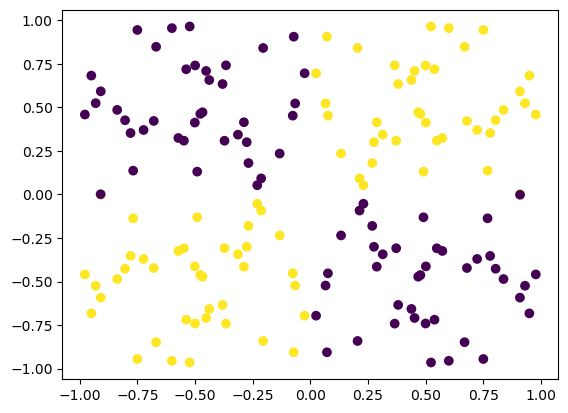

In [26]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

plt.scatter(*zip(*X), c=y)

### Fix outdated code with the newer version modules installed

In [40]:
#print(model.predict_proba(X).reshape(4*n))

# Updated line using the predict method
print(model.predict(X).reshape(4*n))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[0.90930235 0.8896824  0.86403865 0.9070724  0.90087044 0.71297103
 0.9048809  0.90613204 0.89379805 0.807958   0.555152   0.9086736
 0.15516634 0.4949695  0.8924786  0.8549993  0.9025853  0.66118824
 0.58683944 0.8848133  0.6626183  0.88911575 0.34527013 0.89967144
 0.865438   0.46623042 0.30306643 0.81476617 0.91047686 0.8661601
 0.758528   0.6819092  0.886963   0.896344   0.46454358 0.6053497
 0.68037695 0.26527214 0.76941514 0.9053537  0.9050634  0.8786821
 0.88402975 0.9052129  0.89587504 0.74213266 0.89934105 0.90358216
 0.8874227  0.8386041  0.5717363  0.91088563 0.18467866 0.5030489
 0.88104206 0.8403249  0.8982733  0.6906231  0.5924347  0.8749021
 0.65488595 0.9020311  0.32723975 0.9088624  0.85276526 0.46451518
 0.28115147 0.8457193  0.9066853  0.88549256 0.7881347  0.6712588
 0.87644523 0.9077541  0.465582   0.634061   0.67158526 0.3082384
 0.760725   0.8977546  0.8039152  0.1255054  0.5267591  0.07203481
 0.0708058  0.6468673  0.1260192

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


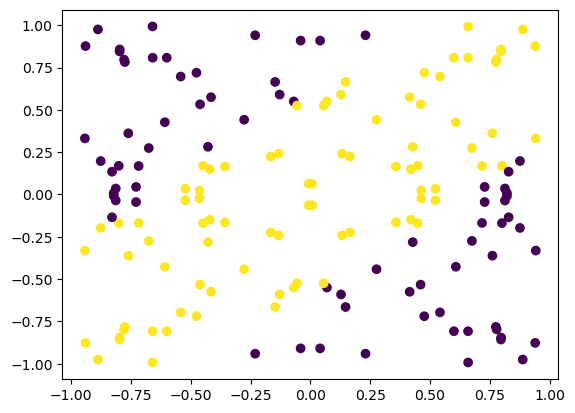

In [41]:
#plt.scatter(*zip(*X), c=model.predict_classes(X))
# Update predict syntax, 
class_predictions = (model.predict(X) > 0.5).astype(int).flatten()
plt.scatter(*zip(*X), c=class_predictions)
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


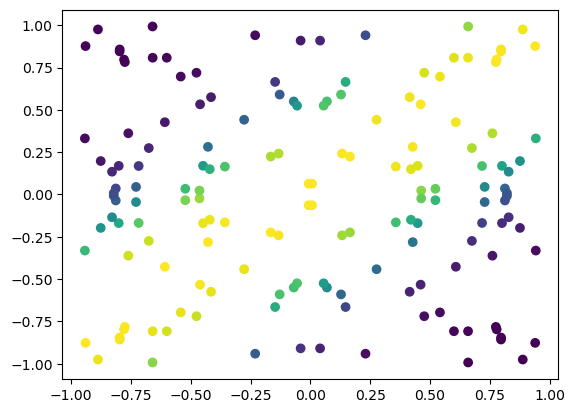

In [42]:
plt.scatter(*zip(*X), c=model.predict(X))

# Testing loop and Visually checking results 
## NOTE: ANSWER TO PART 1 FURTHER BELOW.

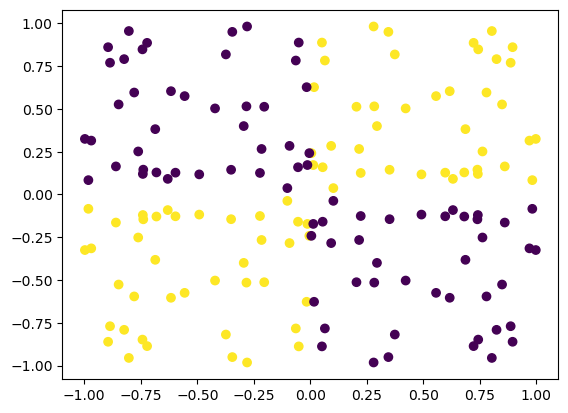

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


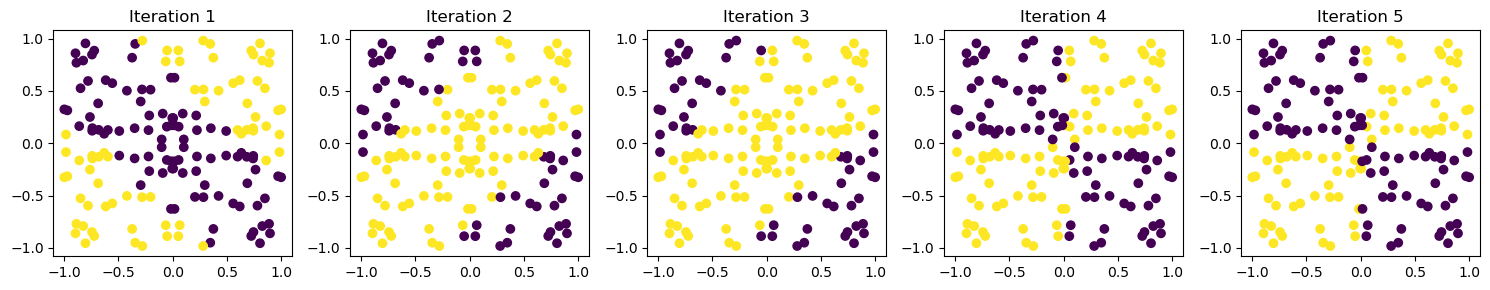

In [53]:
#from tensorflow.keras.optimizers import Adam

# XOR dataset setup
n = 40
xx = np.random.random((n, 1))
yy = np.random.random((n, 1))
X = np.array([np.array([xx, -xx, -xx, xx]), np.array([yy, -yy, yy, -yy])]).reshape(2, 4 * n).T
y = np.array([np.ones([2 * n]), np.zeros([2 * n])]).reshape(4 * n)

# Plot initial XOR distribution
plt.scatter(*zip(*X), c=y)
plt.show()

num_layers = [1, 2, 3, 4, 5]
plt.figure(figsize=(15, 3))
for i, num_layer in enumerate(num_layers, 1):
    model = Sequential()
    model.add(Dense(2, activation='tanh', input_shape=(2,)))  # Increase neuron count and changed activation
    for _ in range(num_layer - 1):
        model.add(Dense(2, activation='tanh'))  # hidden layers
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    sgd = SGD(learning_rate=0.1)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    model.fit(X, y, batch_size=4, epochs=400, verbose=0)
    
    plt.subplot(1, len(num_layers), i)
    predictions = (model.predict(X) > 0.5).astype(int).flatten()
    plt.scatter(*zip(*X), c=predictions)
    plt.title(f'Iteration {i}')
plt.tight_layout()
plt.show()


# Part 1 - XOR: Questions 1 to 4

## Models: 90 different models

In [5]:


# XOR dataset setup
n = 40
xx = np.random.random((n, 1))
yy = np.random.random((n, 1))
X = np.array([np.array([xx, -xx, -xx, xx]), np.array([yy, -yy, yy, -yy])]).reshape(2, 4 * n).T
y = np.array([np.ones([2 * n]), np.zeros([2 * n])]).reshape(4 * n)

# parameters 
num_layers = [1, 2, 3, 4, 5]
neuron_counts = [2, 3, 4]
activation_functions = ['tanh', 'sigmoid', 'softplus', 'relu', 'elu', 'swish']

# count total iterations of parameters
activation_functions_count = len(activation_functions)
neuron_counts_count = len(neuron_counts)
num_layers_count = len(num_layers)

overall_results = {}

# Iterate over activation functions, number of neurons, and hidden layers 
iteration_count = 0
total_iterations = activation_functions_count * neuron_counts_count * num_layers_count
for activation in activation_functions:
    activation_results = {}
    for neurons in neuron_counts:
        for num_layer in num_layers:
            iteration_count += 1
            model = Sequential()
            model.add(Dense(neurons, activation=activation, input_shape=(2,)))
            for _ in range(num_layer - 1):
                model.add(Dense(neurons, activation=activation))
            model.add(Dense(1, activation='sigmoid'))
            sgd = SGD(learning_rate=0.1)
            model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
            history = model.fit(X, y, batch_size=10, epochs=400, verbose=0)  
            eval_loss, eval_accuracy = model.evaluate(X, y, verbose=0)
            
            # print progress
            print(f"Iteration {iteration_count}/{total_iterations} completed: Activation={activation}, Neurons={neurons}, Layers={num_layer}, Loss={eval_loss:.4f}, Accuracy={eval_accuracy:.4f}")
            
            # save scores and counts
            activation_results.setdefault(neurons, []).append((eval_loss, eval_accuracy))
        overall_results[activation] = activation_results

print("All iterations completed.")


Iteration 1/90 completed: Activation=tanh, Neurons=2, Layers=1, Loss=0.4401, Accuracy=0.6938
Iteration 2/90 completed: Activation=tanh, Neurons=2, Layers=2, Loss=0.5736, Accuracy=0.6625
Iteration 3/90 completed: Activation=tanh, Neurons=2, Layers=3, Loss=0.3678, Accuracy=0.8250
Iteration 4/90 completed: Activation=tanh, Neurons=2, Layers=4, Loss=0.3713, Accuracy=0.8375
Iteration 5/90 completed: Activation=tanh, Neurons=2, Layers=5, Loss=0.0274, Accuracy=0.9937
Iteration 6/90 completed: Activation=tanh, Neurons=3, Layers=1, Loss=0.1609, Accuracy=0.9000
Iteration 7/90 completed: Activation=tanh, Neurons=3, Layers=2, Loss=0.0176, Accuracy=0.9937
Iteration 8/90 completed: Activation=tanh, Neurons=3, Layers=3, Loss=0.0138, Accuracy=0.9937
Iteration 9/90 completed: Activation=tanh, Neurons=3, Layers=4, Loss=0.0404, Accuracy=0.9812
Iteration 10/90 completed: Activation=tanh, Neurons=3, Layers=5, Loss=0.0593, Accuracy=0.9812
Iteration 11/90 completed: Activation=tanh, Neurons=4, Layers=1, Loss

## Plots: 90 models plotted w/Max Accuracy and corresponding Loss score

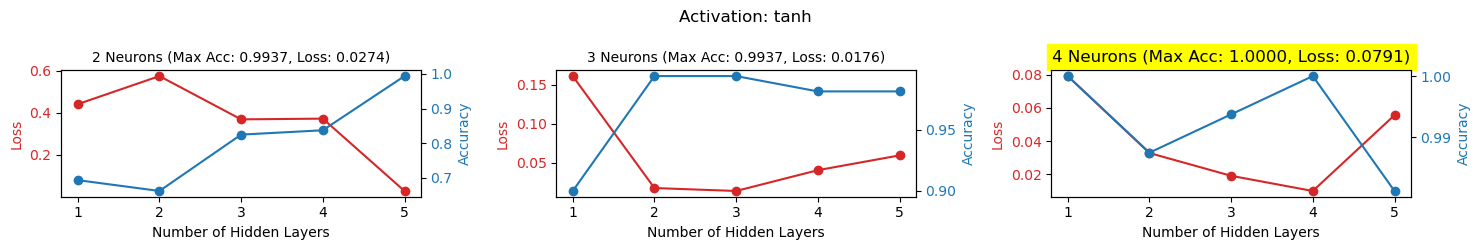

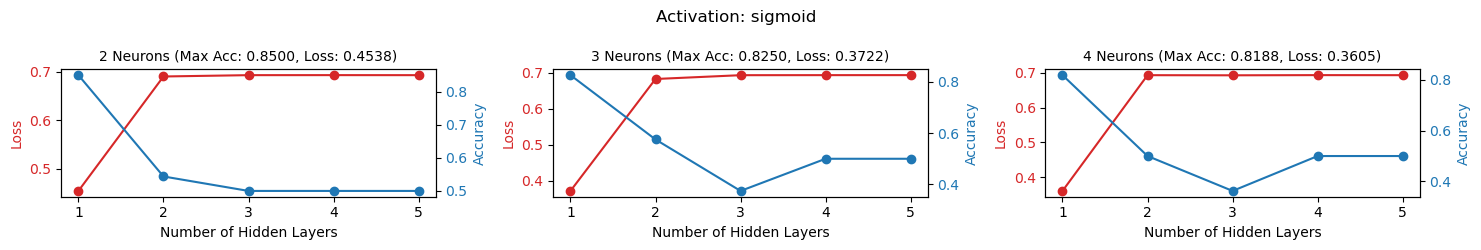

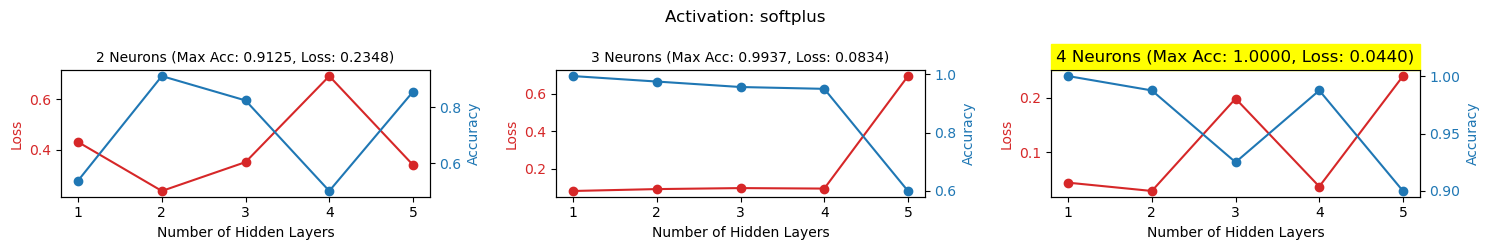

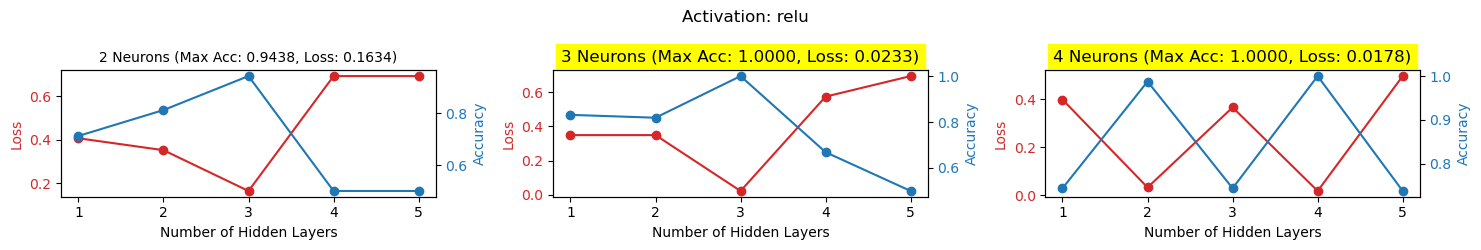

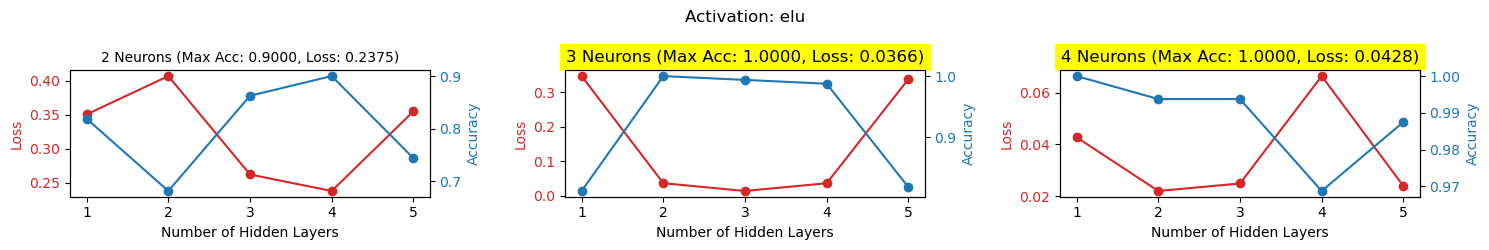

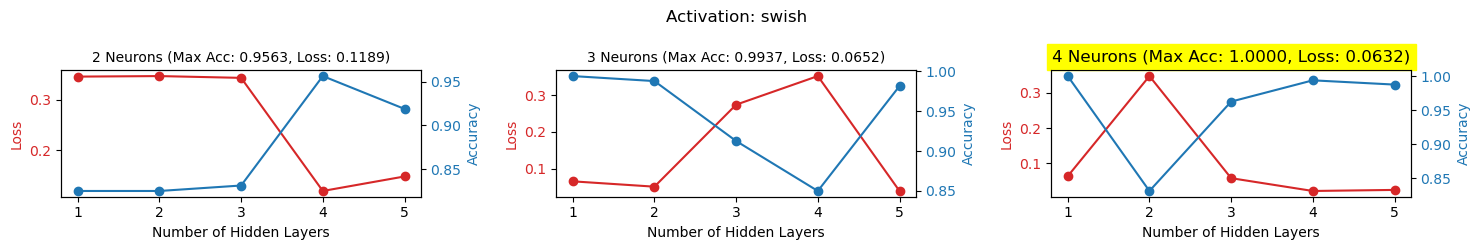

In [8]:
# parameters set to loop through
num_layers = [1, 2, 3, 4, 5]
neuron_cnts = [2, 3, 4]

# Get max Accuracy and associated Loss scores
max_global_accuracy = 0
ties_for_max = []

for activation, neuron_dict in overall_results.items():
    for neurons, results in neuron_dict.items():  # get results list
        accuracies = [acc for _, acc in results]  # get accuracy scores
        local_max_acc = max(accuracies)
        idx_max_acc = accuracies.index(local_max_acc)
        corresponding_loss = results[idx_max_acc][0]  # get corresponding loss scores
        
        if local_max_acc > max_global_accuracy:
            max_global_accuracy = local_max_acc
            ties_for_max = [(activation, neurons, local_max_acc, corresponding_loss)]
        elif local_max_acc == max_global_accuracy:
            ties_for_max.append((activation, neurons, local_max_acc, corresponding_loss))

# loops: plots and highlight maximum accuracy
for activation, neuron_dict in overall_results.items():
    fig, axs = plt.subplots(1, len(neuron_cnts), figsize=(15, 2.5))
    fig.suptitle(f'Activation: {activation}')
    
    for i, neuron_count in enumerate(neuron_cnts):
        results = neuron_dict.get(neuron_count, [])  
        if not results:  
            continue
            
        losses = [loss for loss, _ in results]
        accuracies = [acc for _, acc in results]
        
        ax1 = axs[i]
        color = 'tab:red'
        ax1.set_xlabel('Number of Hidden Layers')
        ax1.set_ylabel('Loss', color=color)
        ax1.plot(num_layers, losses, marker='o', color=color)
        ax1.tick_params(axis='y', labelcolor=color)
        
        ax2 = ax1.twinx()
        color = 'tab:blue'
        ax2.set_ylabel('Accuracy', color=color)
        ax2.plot(num_layers, accuracies, marker='o', color=color)
        ax2.tick_params(axis='y', labelcolor=color)
        
        # Check max accuracy for ties and highlight
        title_text = f'{neuron_count} Neurons (Max Acc: {max(accuracies):.4f}, Loss: {losses[accuracies.index(max(accuracies))]:.4f})'
        if (activation, neuron_count, max(accuracies), losses[accuracies.index(max(accuracies))]) in ties_for_max:
            ax1.set_title(title_text, backgroundcolor='yellow', fontsize=12)
        else:
            ax1.set_title(title_text, fontsize=10)

    fig.tight_layout()
    plt.show()


## Part 1 - XOR: Question 5
#### *Optimal Model*: relu activation, 4 neurons, and 4 hidden layers

In [10]:
# XOR dataset setup
n = 40
xx = np.random.random((n, 1))
yy = np.random.random((n, 1))
X = np.array([np.array([xx, -xx, -xx, xx]), np.array([yy, -yy, yy, -yy])]).reshape(2, 4 * n).T
y = np.array([np.ones([2 * n]), np.zeros([2 * n])]).reshape(4 * n)

# Optimizers to iterate through
optimizers = [Adam(), RMSprop(), Adagrad(), Adamax()]
optimizer_names = ['Adam', 'RMSprop', 'Adagrad', 'Adamax']

# Hardcoded model configuration for relu activation, 4 neurons, and 4 hidden layers
print("Configuration: Activation=relu, Neurons=4, Hidden Layers=4")
for opt, opt_name in zip(optimizers, optimizer_names):
    # Initialize and build model
    model = Sequential()
    model.add(Dense(4, activation='relu', input_shape=(2,)))  # First layer
    for _ in range(3):  # Additional hidden layers (total 5 layers including the first)
        model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    
    # Compile model with current optimizer
    model.compile(optimizer=opt, loss='binary_crossentropy')
    
    # Train model
    history = model.fit(X, y, epochs=400, verbose=0)  # Using 400 epochs as initially suggested
    
    # Report final loss
    final_loss = history.history['loss'][-1]
    print(f"  Optimizer: {opt_name}, Final Loss: {final_loss:.4f}")
print("\n")  # New line for readability


Configuration: Activation=relu, Neurons=4, Hidden Layers=4
  Optimizer: Adam, Final Loss: 0.1119
  Optimizer: RMSprop, Final Loss: 0.1154
  Optimizer: Adagrad, Final Loss: 0.6595
  Optimizer: Adamax, Final Loss: 0.3998




# Part 2 - BYOD (Bring your own Dataset)
Using your own dataset, experiment and find the best Neural Network configuration. 
You may use any resource to improve results, just reference it.

While you may use any dataset, I'd prefer you didn't use the diabetes dataset used in the lesson.

https://stackoverflow.com/questions/34673164/how-to-train-and-tune-an-artificial-multilayer-perceptron-neural-network-using-k

https://keras.io/

# IRIS dataset

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation, Input
from tensorflow.keras.optimizers import Adam
import numpy as np

### Explore and view Iris data

In [17]:
# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [19]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
y.head()

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


## View Iris Actual Data

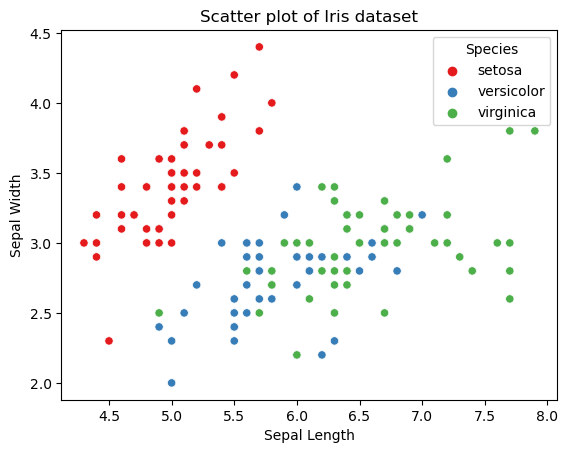

In [24]:
# Plot scatter plot
sns.scatterplot(data=iris_df, x="sepal_length", y="sepal_width", hue="species", palette="Set1")
plt.title("Scatter plot of Iris dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title='Species')
plt.show()

## Models & Plots: 
### Scale/Normalize; Transform target; Train,Test,Split; Create Model Function; Loop thru 4 models; Plot

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


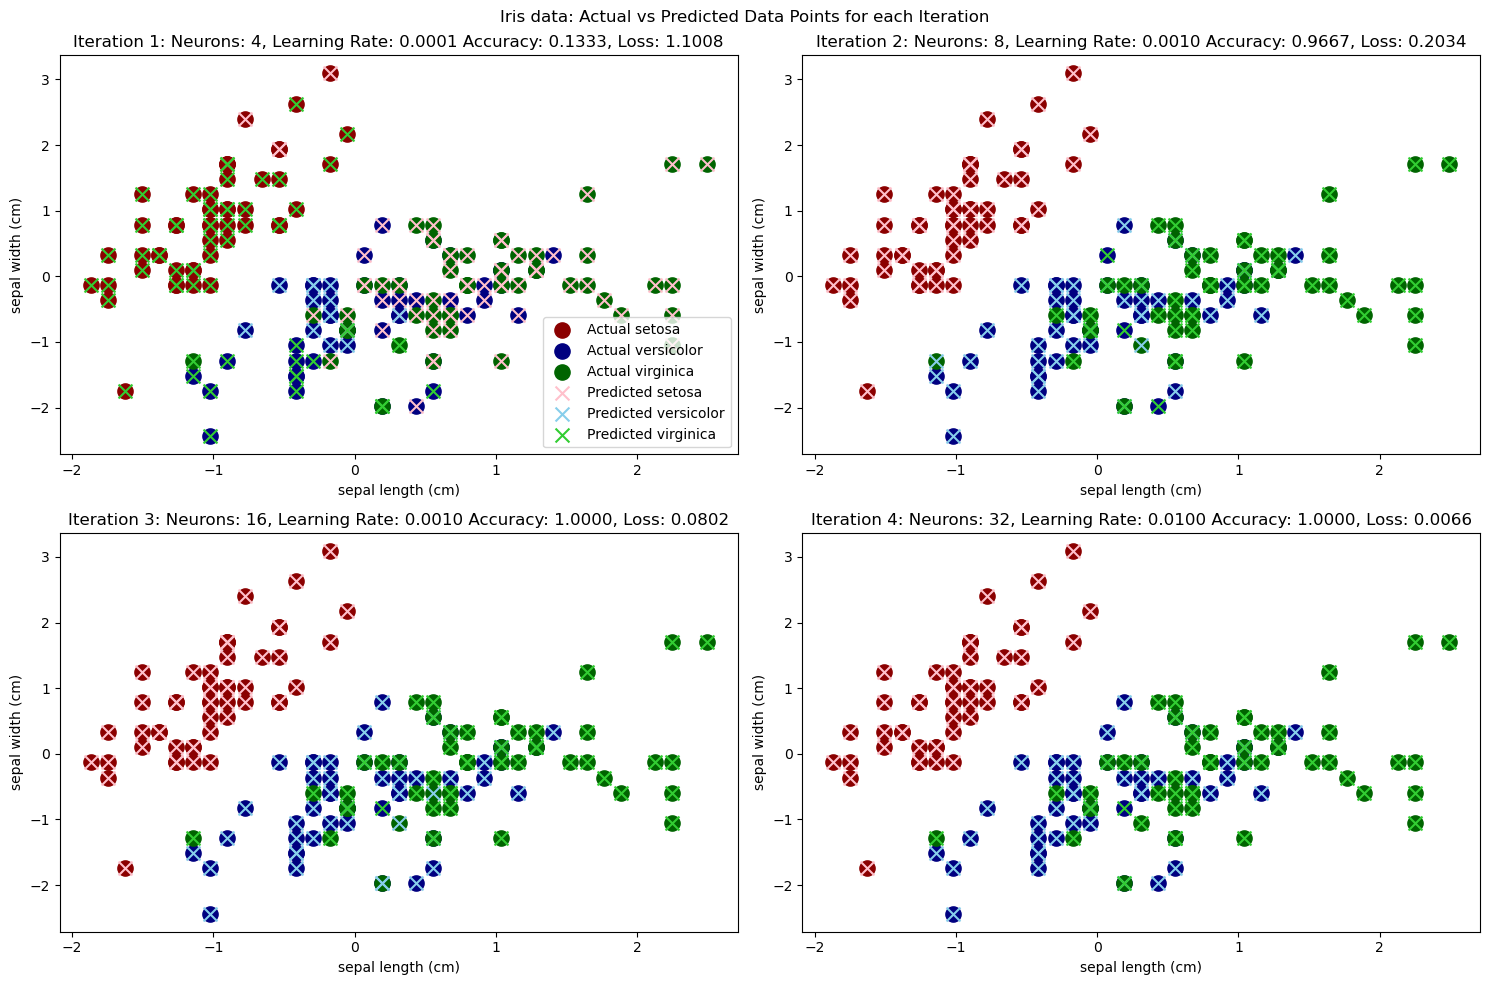

In [55]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode the targets
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y.reshape(-1, 1)).toarray()

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Define and compile the neural network model with variable neurons and learning rate
def create_model(neurons, learning_rate):
    model = Sequential([
        Input(shape=(4,)),
        Dense(neurons, activation='relu'),
        Dropout(0.2),
        Dense(neurons, activation='relu'),
        Dropout(0.2),
        Dense(3, activation='softmax')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Configurations for iterations
configurations = [
    {'neurons': 4, 'learning_rate': 0.0001},
    {'neurons': 8, 'learning_rate': 0.001},
    {'neurons': 16, 'learning_rate': 0.001},
    {'neurons': 32, 'learning_rate': 0.01}
]

# select colors: for actual and predicted 
actual_colors = ['darkred', 'navy', 'darkgreen']  
predicted_colors = ['pink', 'skyblue', 'limegreen']

# set subplots into 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Iris data: Actual vs Predicted Data Points for each Iteration')

# Loop thru configurations
for i, config in enumerate(configurations):
    model = create_model(config['neurons'], config['learning_rate'])
    model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    predictions = np.argmax(model.predict(X_scaled), axis=1)
    true_labels = np.argmax(y_encoded, axis=1)

    ax = axs[i//2, i%2]  # set each subplot position
    for k, class_label in enumerate(iris.target_names):
        ax.scatter(X_scaled[true_labels == k, 0], X_scaled[true_labels == k, 1], label=f'Actual {class_label}', color=actual_colors[k], s=120)
    for k, class_label in enumerate(iris.target_names):
        ax.scatter(X_scaled[predictions == k, 0], X_scaled[predictions == k, 1], color=predicted_colors[k], marker='x', s=100, label=f'Predicted {class_label}')
    
    title_text = f'Iteration {i+1}: Neurons: {config["neurons"]}, Learning Rate: {config["learning_rate"]:.4f} Accuracy: {accuracy:.4f}, Loss: {loss:.4f}'
    ax.set_title(title_text)
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    
    if i == 0:  # set legend in the first plot 
        ax.legend()

plt.tight_layout()
plt.show()




# IGNORE BELOW - CLASS NOTES

## Using Diabetes data 

http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

In [129]:
# load pima indians dataset
dataset = numpy.loadtxt("../../data/pima-indians-diabetes.data", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [136]:
# create model
model = Sequential()
model.add(Dense(16, input_dim=8, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=1000, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/1000
768/768 [==============================] - 1s - loss: 0.6821 - acc: 0.5820     
Epoch 2/1000
768/768 [==============================] - 0s - loss: 0.6273 - acc: 0.6536     
Epoch 3/1000
768/768 [==============================] - 0s - loss: 0.6122 - acc: 0.6719     
Epoch 4/1000
768/768 [==============================] - 0s - loss: 0.6111 - acc: 0.6680     
Epoch 5/1000
768/768 [==============================] - 0s - loss: 0.6065 - acc: 0.6862     
Epoch 6/1000
768/768 [==============================] - 0s - loss: 0.6049 - acc: 0.6745     
Epoch 7/1000
768/768 [==============================] - 0s - loss: 0.5978 - acc: 0.6810     
Epoch 8/1000
768/768 [==============================] - 0s - loss: 0.5961 - acc: 0.6823     
Epoch 9/1000
768/768 [==============================] - 0s - loss: 0.5927 - acc: 0.6966     
Epoch 10/1000
768/768 [==============================] - 0s - loss: 0.5906 - acc: 0.6953     
Epoch 11/1000
768/768 [==============================] - 0s - loss: 0

768/768 [==============================] - 0s - loss: 0.5103 - acc: 0.7539     
Epoch 175/1000
768/768 [==============================] - 0s - loss: 0.5135 - acc: 0.7565     
Epoch 176/1000
768/768 [==============================] - 0s - loss: 0.5115 - acc: 0.7552     
Epoch 177/1000
768/768 [==============================] - 0s - loss: 0.5084 - acc: 0.7500     
Epoch 178/1000
768/768 [==============================] - 0s - loss: 0.5079 - acc: 0.7591     
Epoch 179/1000
768/768 [==============================] - 0s - loss: 0.5088 - acc: 0.7591     
Epoch 180/1000
768/768 [==============================] - 0s - loss: 0.5059 - acc: 0.7630     
Epoch 181/1000
768/768 [==============================] - 0s - loss: 0.5171 - acc: 0.7409     
Epoch 182/1000
768/768 [==============================] - 0s - loss: 0.5123 - acc: 0.7435     
Epoch 183/1000
768/768 [==============================] - 0s - loss: 0.5168 - acc: 0.7526     
Epoch 184/1000
768/768 [==============================] - 0s - lo

768/768 [==============================] - 0s - loss: 0.4906 - acc: 0.7656     
Epoch 347/1000
768/768 [==============================] - 0s - loss: 0.4924 - acc: 0.7734     
Epoch 348/1000
768/768 [==============================] - 0s - loss: 0.4848 - acc: 0.7734     
Epoch 349/1000
768/768 [==============================] - 0s - loss: 0.4895 - acc: 0.7669     
Epoch 350/1000
768/768 [==============================] - 0s - loss: 0.4924 - acc: 0.7656     
Epoch 351/1000
768/768 [==============================] - 0s - loss: 0.4906 - acc: 0.7643     
Epoch 352/1000
768/768 [==============================] - 0s - loss: 0.4851 - acc: 0.7747     
Epoch 353/1000
768/768 [==============================] - 0s - loss: 0.4825 - acc: 0.7747     
Epoch 354/1000
768/768 [==============================] - 0s - loss: 0.4781 - acc: 0.7786     
Epoch 355/1000
768/768 [==============================] - 0s - loss: 0.4828 - acc: 0.7656     
Epoch 356/1000
768/768 [==============================] - 0s - lo

768/768 [==============================] - 0s - loss: 0.4801 - acc: 0.7760     
Epoch 519/1000
768/768 [==============================] - 0s - loss: 0.4730 - acc: 0.7760     
Epoch 520/1000
768/768 [==============================] - 0s - loss: 0.4705 - acc: 0.7865     
Epoch 521/1000
768/768 [==============================] - 0s - loss: 0.4742 - acc: 0.7734     
Epoch 522/1000
768/768 [==============================] - 0s - loss: 0.4693 - acc: 0.7878     
Epoch 523/1000
768/768 [==============================] - 0s - loss: 0.4825 - acc: 0.7630     
Epoch 524/1000
768/768 [==============================] - 0s - loss: 0.4787 - acc: 0.7812     
Epoch 525/1000
768/768 [==============================] - 0s - loss: 0.4712 - acc: 0.7865     
Epoch 526/1000
768/768 [==============================] - 0s - loss: 0.4652 - acc: 0.7878     
Epoch 527/1000
768/768 [==============================] - 0s - loss: 0.4686 - acc: 0.7891     
Epoch 528/1000
768/768 [==============================] - 0s - lo

768/768 [==============================] - 0s - loss: 0.4566 - acc: 0.7812     
Epoch 691/1000
768/768 [==============================] - 0s - loss: 0.4701 - acc: 0.7773     
Epoch 692/1000
768/768 [==============================] - 0s - loss: 0.4743 - acc: 0.7799     
Epoch 693/1000
768/768 [==============================] - 0s - loss: 0.4768 - acc: 0.7773     
Epoch 694/1000
768/768 [==============================] - 0s - loss: 0.4626 - acc: 0.7878     
Epoch 695/1000
768/768 [==============================] - 0s - loss: 0.4622 - acc: 0.7904     
Epoch 696/1000
768/768 [==============================] - 0s - loss: 0.4624 - acc: 0.7826     
Epoch 697/1000
768/768 [==============================] - 0s - loss: 0.4634 - acc: 0.7917     
Epoch 698/1000
768/768 [==============================] - 0s - loss: 0.4624 - acc: 0.7813     
Epoch 699/1000
768/768 [==============================] - 0s - loss: 0.4590 - acc: 0.7917     
Epoch 700/1000
768/768 [==============================] - 0s - lo

768/768 [==============================] - 0s - loss: 0.4636 - acc: 0.7865     
Epoch 863/1000
768/768 [==============================] - 0s - loss: 0.4605 - acc: 0.7839     
Epoch 864/1000
768/768 [==============================] - 0s - loss: 0.4657 - acc: 0.7773     
Epoch 865/1000
768/768 [==============================] - 0s - loss: 0.4735 - acc: 0.7669     
Epoch 866/1000
768/768 [==============================] - 0s - loss: 0.4608 - acc: 0.7904     
Epoch 867/1000
768/768 [==============================] - 0s - loss: 0.4640 - acc: 0.7956     
Epoch 868/1000
768/768 [==============================] - 0s - loss: 0.4449 - acc: 0.7969     
Epoch 869/1000
768/768 [==============================] - 0s - loss: 0.4544 - acc: 0.7812     
Epoch 870/1000
768/768 [==============================] - 0s - loss: 0.4624 - acc: 0.7839     
Epoch 871/1000
768/768 [==============================] - 0s - loss: 0.4663 - acc: 0.7760     
Epoch 872/1000
768/768 [==============================] - 0s - lo